# Soccer's One Statistic To Rule Them All
## Quantifying the Value of Individual Talent In A Largely, Unquantifiable Game

It is of no surprise that when it comes to statistics the world’s most popular sport is a bit old fashion in comparison to its data-rich peers. People in soccer have historically paid little attention to statistics, arguing that the only way to judge players is to see them in action. What else would you expect from a game that is essentially one long continuous event? 

The main reason, in my opinion, that organizations in Baseball, Football, and Basketball have all fully embraced the statistical renaissance over the past two decades, is because their respective games can be broken down into discrete events. Each of these games is a culmination of starts and stops allowing each player to have a unique recorded statistic unique their position. On top of these individual recorded statistics, each sport also offers aggregate statistics that are quite accurate of a player’s overall performance:
- **On Base Percentage (OBP)** is a Baseball statistic that refers to how frequently a batter reaches base per plate appearance. Times on base include hits, walks, and hit-by-pitches.
- **Total Quarterback Rating (Total QBR)** is an American Football aggregate statistic that “incorporates all of a quarterback’s contributions to winning, including how he impacts the game on passes, rushes, turnovers, and penalties.”
- **Player Efficiency Rating (PER)** is an aggregate statistic for the NBA strives to measure a player's per-minute performance, while adjusting for pace. PER takes into account accomplishments, such as field goals, free throws, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and personal fouls. The NBA goes as far as even providing a categorical "grade" on different ranges of this statistic. You could know whether a player is a "Runaway MVP Candidate" or a "Fringe Roster Player" all from just a single number.

![title](img/PER_NBA.jpg)

These aggregate statistics allow a team owner to reasonably quantify a player’s overall impact on his/her team. Thus, if one can quantify a player’s individual performance along with their impact on a team then one can essentially quantify their market value while significantly reducing the downside on such an investment. Unfortunately for soccer club owners, they do not get to enjoy such privileged information. 

Analyzing soccer statistics is difficult because there are no magic-bullet figures like ***Player Efficiency Rating*** in basketball that can encapsulate a player’s overall ability. In a nutshell, the only individual statistics generated during a soccer match are a bit more rudimentary:

    1) Who scored a goal and at what time

    2) Who assisted the goal

    3) How much distance did a player cover 

    4) What percentage of a player’s passes did they complete

    5) How many goals did you allow (If you are a goalie.)

That’s about all we get numerically. If you are a Striker or an Attacking Midfielder then ***goals scored*** and ***goals assisted per minute of gameplay*** are a decent way to quantify your production. However, if you are a Defending Midfielder or a Defending Back, there isn’t any statistic that could represent your performance. It is clear that judging talent in soccer, and assigning its respective monetary value, is a subjective art.

### How can we quantify, unquantifiable value? How can we numerically represent subjective judgment?
That’s what a lot of sports analysis is about: using data to learn things about the game that aren’t obvious and may even be counterintuitive.

In pondering these questions I couldn’t think of a better source to start at than FIFA. FIFA (International Federation of Association Football) is the international governing body of association football, fútsal, beach soccer, and eFootball. They are responsible for the organization of football's major international tournaments, notably the World Cup. It’s safe to say they know quite a thing or two about the sport and interestingly enough they publish a video game every year.

In this videogame, soccer players are rated over a large variety of categories so that when a game is simulated you could expect a somewhat accurate skill level respective to each individual player's talents. In essence, the good players play good and the bad players play bad. Although I do not believe this dataset is all-encompassing, I think it is a great start on how we could perhaps begin to quantify the subjective judgement of experts and start to gain insight on what makes a player valuable. Interestingly enough, the data also contains **Overall Player Rating** and **Value** metrics. 

Is **Overall Player Rating** the one statistic to rule them all for Soccer?! To answer this we need to know:

    1) Is there a relationship between Overall Player Rating (OPR) and Value?
    2) If so, What exactly influences Overall Player Rating?



Let's explore the dataset.

In [19]:
import numpy as np
from scipy import stats
from scipy.interpolate import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv('FIFA-19.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Preview Datatypes

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

#### Prep 'Value' and 'Wage' Columns
Remove '€','M','K' from 'Value' series as prep for conversion into numeric type. Since we have two units of measure in single column (Millions-'M' and Thousands-'K') we need to clean and then normalize values)

In [22]:
df[['Value','Wage']].head() #Check Head to see format

,Value,Wage
0,€110.5M,€565K
1,€77M,€405K
2,€118.5M,€290K
3,€72M,€260K
4,€102M,€355K


In [23]:
df[['Value','Wage']].tail() #Check Tail to see format

,Value,Wage
18202,€60K,€1K
18203,€60K,€1K
18204,€60K,€1K
18205,€60K,€1K
18206,€60K,€1K


In [24]:
df['Value'] = df['Value'].apply(lambda x: x.split('€')[1]) #Remove Euro
df['Value'] = df['Value'].apply(lambda x: x.split('M')[0] if 'M' in x else x) #Remove Millions Unit
df['Value'] = df['Value'].apply(lambda x: x.split('K')[0]+'000' if 'K' in x else x) #Remove Thousands Unit and add three zeros
df['Value'] = df['Value'].apply(lambda x: x.split('.')[0] + x.split('.')[1] + '00000' if '.' in x else x) #Split decimaled Millions values and add 5 zeros
df['Value'] = df['Value'].apply(lambda x: x+'000000' if len(x) <= 3 else x) # Get the remaining Millions values and add 6 zeros

#### Remove '€','K' from 'Wage' series and normalize values as prep for conversion into numeric type.

In [25]:
df['Wage'] = df['Wage'].apply(lambda x: x.split('€')[1]) #Remove Euro
df['Wage'] = df['Wage'].apply(lambda x: x.split('K')[0]+'000' if 'K' in x else x) #Remove Thousands Unit and add three zeros
df[['Value','Wage']].head() #Check Head to see format

,Value,Wage
0,110500000,565000
1,77000000,405000
2,118500000,290000
3,72000000,260000
4,102000000,355000


In [26]:
df[['Value','Wage']].tail() #Check Tail to see format

,Value,Wage
18202,60000,1000
18203,60000,1000
18204,60000,1000
18205,60000,1000
18206,60000,1000


#### Prep 'Weight' Columns. Remove 'lbs' and Return df without 'nan' values in weight column

In [27]:
df['Weight'].value_counts() # Check overall format of Weight values
df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].apply(lambda x: x[0:3])
df = df[df['Weight'] != 'nan']

#### Convert Object-type columns to numeric

In [28]:
df[['Value','Wage','International Reputation','Skill Moves','Weight']] = df[['Value','Wage','International Reputation','Skill Moves','Weight']].astype('int64')
df[['Value','Wage']] = df[['Value','Wage']] / 1000000 # Normalize values as units in Millions
df[['Value','Wage']].head()

,Value,Wage
0,110.5,0.565
1,77.0,0.405
2,118.5,0.290
3,72.0,0.260
4,102.0,0.355


# Part 1: Is Overall Player Rating correlated to Value?
## Overall Value (Overall Rating vs Value)

First we will look at the overall relationship between ***Overall Rating / Value / Wage aka 'Overall Value'***


In [29]:
overall_value = df[['Name','Overall','Value']]
overall_value.head()

,Name,Overall,Value
0,L. Messi,94,110.5
1,Cristiano Ronaldo,94,77.0
2,Neymar Jr,92,118.5
3,De Gea,91,72.0
4,K. De Bruyne,91,102.0


#### Overall Player Rating Distribution

Text(0.5, 0, 'Overall Player Rating')

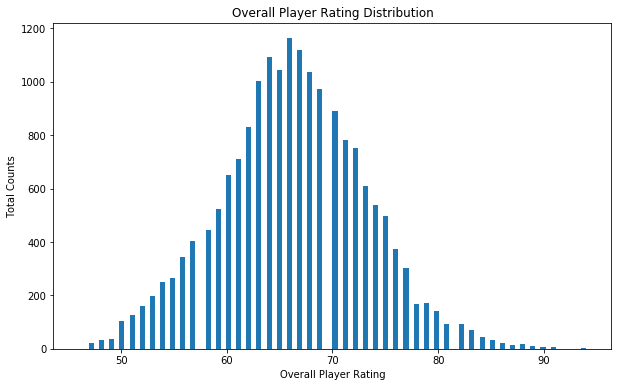

In [30]:
plt.figure(figsize=(10,6))
plt.hist(overall_value['Overall'], bins=100)
plt.title('Overall Player Rating Distribution')
plt.ylabel('Total Counts')
plt.xlabel('Overall Player Rating')

In [31]:
# What percentage of Players are at or below a 70 Rating?
sum(overall_value['Overall'] <=70) / overall_value['Overall'].count()

0.7384767883694036

To start things off we want to understand how the **Overall Player Ratings** are distributed. Looking at the chart we can observe that the data follows a normal distribution with the mean residing somewhere in the mid 60s. About 74% of players are at or below a rating of 70. 

#### Player Value Distribution

Total number of Players: 18159


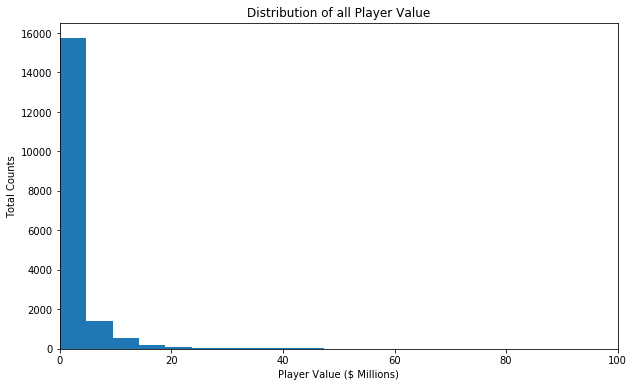

In [32]:
plt.figure(figsize=(10,6))

plt.hist(overall_value['Value'], bins=25)

plt.title('Distribution of all Player Value')
plt.ylabel('Total Counts')
plt.xlabel('Player Value ($ Millions)')
plt.xlim((0,100))
print(f"Total number of Players: {overall_value['Value'].count()}")

Here we see that the distribution of Player Value is significantly skewed right. This makes sense as the majority of players should be on the lower spectrum of Value with the Elite few earning the Big Bucks. With the information so far I am expecting to see some type of exponential curve when both Rating and Value are plotted against each other

#### Plot Overall Player Rating vs Value

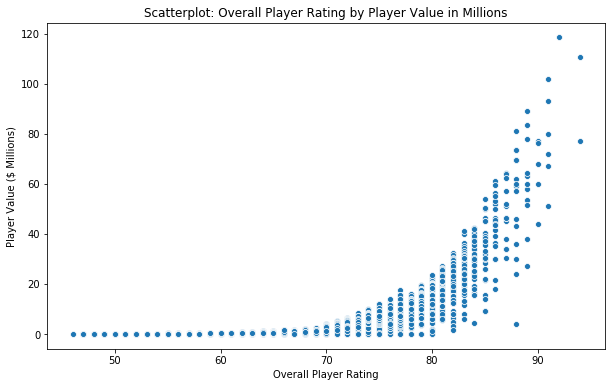

In [33]:
plt.figure(figsize=(10,6))
g = sns.scatterplot(y='Value', 
                    x='Overall',
                    data= overall_value)
plt.title('Scatterplot: Overall Player Rating by Player Value in Millions')
plt.ylabel('Player Value ($ Millions)')
plt.xlabel('Overall Player Rating')
plt.show()

When comparing Value against Overall Player Rating we get what looks to be an exponential-logrithmic distribution. This is a very interesting result as it is starting to show that there could be a very clear relationship between Player Value and FIFA's subjective Overall Player Rating. With that said let's see if we can fit a line to this distribution and see if we can get some accurate information on its respective fit.

#### Let's try and see if we can fit a line to the plot

Text(0.5, 0, 'Overall Player Rating')

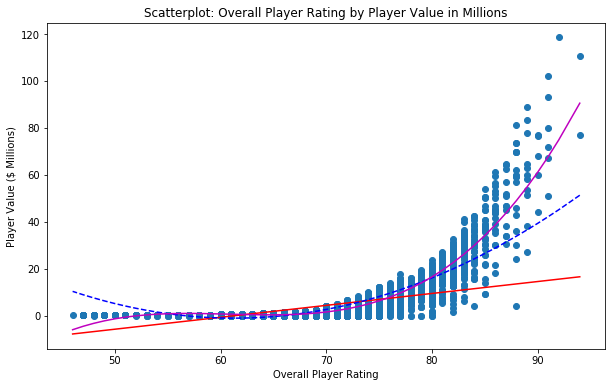

In [34]:
plt.figure(figsize=(10,6))

# Assign X and Y values to variables to make code easier to read
y = overall_value['Value']
x = overall_value['Overall']

# Create coefficients
p1 = np.polyfit(x,y,1)
p2 = np.polyfit(x,y,2)
p3 = np.polyfit(x,y,3)

# Plot Polinomials
plt.scatter(x,y)
plt.plot(x,np.polyval(p1,x),'r-')
plt.plot(x,np.polyval(p2,x),'b--')
plt.plot(x,np.polyval(p3,x),'m-')

plt.title('Scatterplot: Overall Player Rating by Player Value in Millions')
plt.ylabel('Player Value ($ Millions)')
plt.xlabel('Overall Player Rating')

After plotting three lines and three different degree factors we are starting to see some form on our regression. **p3** seams to follow the shape curve closely, however let's see if we can improve that an tighten up the ends of the projection.

Text(0.5, 0, 'Overall Player Rating')

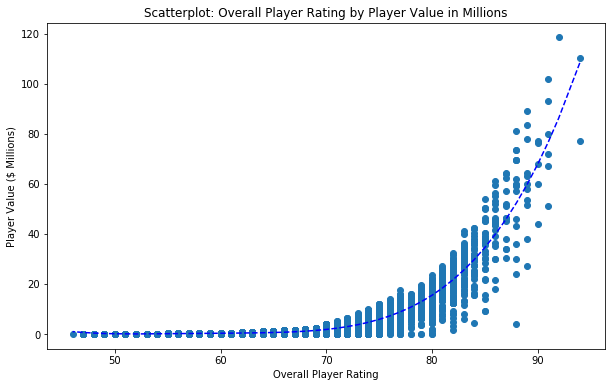

In [35]:
plt.figure(figsize=(10,6))

# Create coefficients
p3 = np.polyfit(x,y,3)
p4 = np.polyfit(x,y,4)
p5 = np.polyfit(x,y,5)

# Plot Polinomials
plt.scatter(x,y)
#plt.plot(x,np.polyval(p3,x),'r-')
plt.plot(x,np.polyval(p4,x),'b--')
#plt.plot(x,np.polyval(p5,x),'m:')

plt.title('Scatterplot: Overall Player Rating by Player Value in Millions')
plt.ylabel('Player Value ($ Millions)')
plt.xlabel('Overall Player Rating')

**p4 and p5**, which are virtually the same curve, seems to slightly outperform **p3**. Let's take a look at r-squared values for both **p3 and p4** so we can determine 'goodness of fit' for each of the curves.

#### Calculate R-squared

First we need to calculate p(x) for each of the curves.

Essentially we need to fit a polynomial p(x) = p[0] * x^deg + ... + p[deg] of degree deg to points (x, y). 

In [36]:
# Print coeefficients for p3 and p4
print(p3)
print(p4)

[ 2.56929419e-03 -4.68849708e-01  2.84018886e+01 -5.70537556e+02]
[ 6.54199713e-05 -1.52087128e-02  1.32453820e+00 -5.11766478e+01
  7.39782784e+02]


In [37]:
# Create p(x) for each curve with each respective set of coefficients and solve for r-squared
yfit_p3 = p3[0] * x**3 + p3[1] * x**2 + p3[2] * x + p3[3]
yresid_p3 = y - yfit_p3
SSresid_p3 = sum(pow(yresid_p3,2))
SStotal_p3 = len(y) * np.var(y)
r_sqrd_p3 = 1 - SSresid_p3/SStotal_p3

yfit_p4 = p4[0] * x**4 + p4[1] * x**3 + p4[2] * x**2 + p4[3] * x + p4[4]
yresid_p4 = y - yfit_p4
SSresid_p4 = sum(pow(yresid_p4,2))
SStotal_p4 = len(y) * np.var(y)
r_sqrd_p4 = 1 - SSresid_p4/SStotal_p4

print(f'''
    r_sqrd_p3: {r_sqrd_p3}
    r_sqrd_p4: {r_sqrd_p4}
    ''')


    r_sqrd_p3: 0.8854144000743374
    r_sqrd_p4: 0.8970038783082243
    


I certainly was not expecting such high values! I do believe though that these high values are cause by the near-zero variation between **Value** and **Overall Player Rating** from 0 and 70. Let's look at the distribution again for **Overall Player Rating** 

Text(0.5, 0, 'Overall Player Rating')

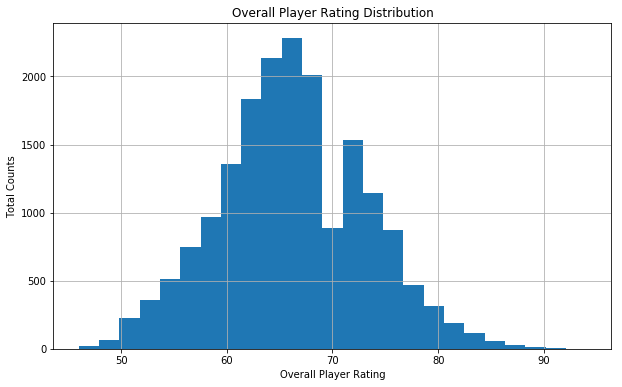

In [38]:
plt.figure(figsize=(10,6))
df['Overall'].hist(bins=25)
plt.title('Overall Player Rating Distribution')
plt.ylabel('Total Counts')
plt.xlabel('Overall Player Rating')

My fear with this is that with 3/4s of our data lying at or below a 70 player rating, this data might be skewing our goodness of fit values and thus not giving us an accurate understanding of the data relationship above a 70 rating. To be sure that Let's try a couple of things before we more forward, just to make sure we arent dealing with any bias:

**1) Let's see how our current curve performs on a dataset where [Overall Player Rating** > 70]

**2) Let's then create a New curve for a dataset where [Overall Player Rating** > 70]

### Calculate new r-Squared with data @ **Overall Player Rating** > 70 on the using the same curve for **p3** and **p4**

In [39]:
print(f''' Old r2:
    r_sqrd_p3: {r_sqrd_p3}
    r_sqrd_p4: {r_sqrd_p4}
    ''')

# Return filtered dataset
overall_value_Ove70 = overall_value[overall_value['Overall'] >70]
y = overall_value_Ove70['Value']
x = overall_value_Ove70['Overall']

# Calculate r-squared for each polynomial
yfit_p3 = p3[0] * x**3 + p3[1] * x**2 + p3[2] * x + p3[3]
yresid_p3 = y - yfit_p3
SSresid_p3 = sum(pow(yresid_p3,2))
SStotal_p3 = len(y) * np.var(y)
r_sqrd_p3 = 1 - SSresid_p3/SStotal_p3

yfit_p4 = p4[0] * x**4 + p4[1] * x**3 + p4[2] * x**2 + p4[3] * x + p4[4]
yresid_p4 = y - yfit_p4
SSresid_p4 = sum(pow(yresid_p4,2))
SStotal_p4 = len(y) * np.var(y)
r_sqrd_p4 = 1 - SSresid_p4/SStotal_p4

print(f''' New r2:
    r_sqrd_p3: {r_sqrd_p3}
    r_sqrd_p4: {r_sqrd_p4}
    ''')

 Old r2:
    r_sqrd_p3: 0.8854144000743374
    r_sqrd_p4: 0.8970038783082243
    
 New r2:
    r_sqrd_p3: 0.8459396955492134
    r_sqrd_p4: 0.8555368100665616
    


We see that there is not much of a decrease on both **p3** and **p4** r-squared values meaning the lack of Sub-70 ratings didn't really affect the overall fit of our original curve.

However just to cross our 'Ts' and dot our 'Is', let's refite a new cover to a distribution of **Overall Player Rating** >= 70'. Can we get a more accurate fit?

### Re-fit curve to new distribution @ '**Overall Player Rating** >= 70' and calculate new r-squared 

Text(0.5, 0, 'Overall Player Rating')

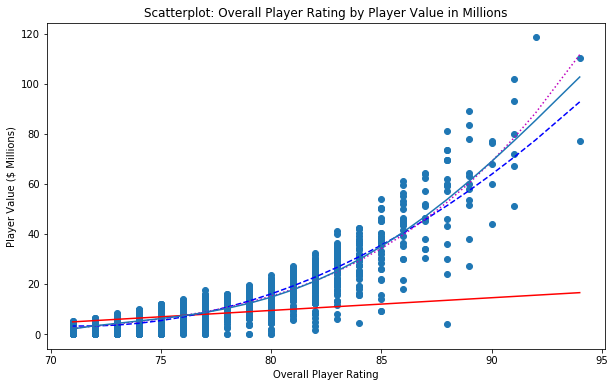

In [40]:
plt.figure(figsize=(10,6))
# Assign X and Y values to variables to make code easier to read
overall_value_cust = overall_value[overall_value['Overall'] >70]
y2 = overall_value_cust['Value']
x2 = overall_value_cust['Overall']

# Create coefficients
p2 = np.polyfit(x2,y2,2)
p3 = np.polyfit(x2,y2,3)
p4 = np.polyfit(x2,y2,4)
p5 = np.polyfit(x2,y2,5)

# Plot Polinomials
plt.scatter(x2,y2)
plt.plot(x2,np.polyval(p1,x2),'r-')
plt.plot(x2,np.polyval(p2,x2),'b--')
plt.plot(x2,np.polyval(p3,x2),'m:')
plt.plot(x2,np.polyval(p4,x2))

plt.title('Scatterplot: Overall Player Rating by Player Value in Millions')
plt.ylabel('Player Value ($ Millions)')
plt.xlabel('Overall Player Rating')

In [41]:
# Let's make our lives easier and create a function to calculate r-squared values

def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

    # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    
    # fit values, and mean
    yhat = p(x)                      # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['r-squared'] = ssreg / sstot

    return results

In [42]:
print(f'''New r2:
    r_sqrd_p3: {r_sqrd_p3}
    r_sqrd_p4: {r_sqrd_p4}
    ''')
print('Even Newer r2')
print(polyfit(x2, y2, 2)['r-squared'])
print(polyfit(x2, y2, 3)['r-squared'])
print(polyfit(x2, y2, 4)['r-squared'])
print(polyfit(x2, y2, 5)['r-squared'])

New r2:
    r_sqrd_p3: 0.8459396955492134
    r_sqrd_p4: 0.8555368100665616
    
Even Newer r2
0.8474401499941302
0.8567092499619131
0.8580557631215332
0.8586776320826566


Not much of an improvement at all (.003 increase). **Looks like our original curve is good enough!**

### Thoughts thus far:
1) There is a clear pattern between **Overall Player Rating** and **Value**. FIFA actually might be up to something on how they approach quantifying a player's level of talent.

2) The data, however, takes into account every single position. **How would the overall relationship look like if segmented it by positiion? Do they have the same shape and r2 values?**

# Let's re-look at the data segemented into Positions

#### Looking at the unique positions we will start by creating 4 Groups and Analyzing them:

1) Forwards/Attackers

2) Midfielders
- *Midfielders have many different roles with many specializing in attacking or defensive roles but for now we will group them*
    
3) Defense

4) Goal Keepers

In [43]:
df['Position'].unique() # Return all unique positions

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [44]:
# Create a function to Categorize all unique positions
def pos_groups(x):
    if x in ['RF','ST','LW','LF','RW','CF','LS','RS']:
        return 'Forwards'
    elif x in ['RCM','LCM','LDM','CAM','CDM','RM','LAM','LM','RDM','CM','RAM']:
        return 'Midfielders'
    elif x in ['RCB', 'CB','LCB','LB','RB','RWB','LWB']:
        return 'Defense'
    elif x in ['GK']:
        return 'GK'
    else:
        return 'nan'

In [45]:
# Create New column of 'Position' Categoricals
df['Position_Grp'] = df['Position'].apply(pos_groups)
#df['Position_Grp'].head()

In [46]:
# Create unique dataframes for each category
df_For = df[df['Position_Grp'] == 'Forwards']
df_Mid = df[df['Position_Grp'] == 'Midfielders']
df_Def = df[df['Position_Grp'] == 'Defense']
df_GK = df[df['Position_Grp'] == 'GK']

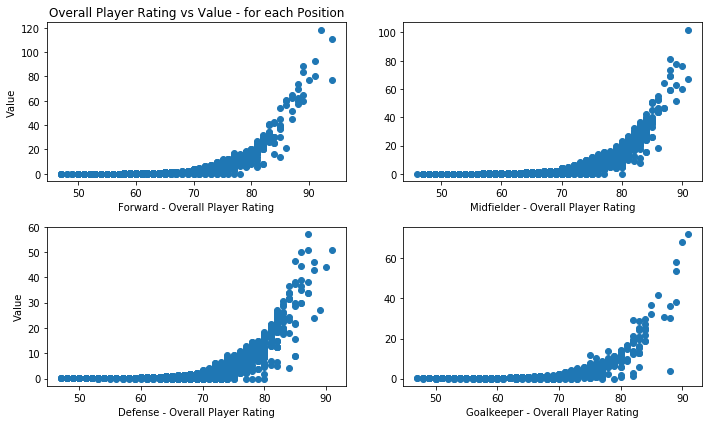

In [47]:
# Plot all four Rating vs Value plots side-by-side

plt.figure(figsize=(10,6))
plt.subplot(2, 2, 1)
plt.scatter(df_For['Overall'], df_For['Value'])
plt.title('Overall Player Rating vs Value - for each Position')
plt.xlabel('Forward - Overall Player Rating')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
plt.scatter(df_Mid['Overall'], df_Mid['Value'])
plt.xlabel('Midfielder - Overall Player Rating')

plt.subplot(2, 2, 3)
plt.scatter(df_Def['Overall'], df_Def['Value'])
plt.xlabel('Defense - Overall Player Rating')
plt.ylabel('Value')

plt.subplot(2, 2, 4)
plt.scatter(df_GK['Overall'], df_GK['Value'])
plt.xlabel('Goalkeeper - Overall Player Rating')

plt.tight_layout()
plt.show()

Although they all seem to have the same shape, it is interesting to notice the ranges and ceilings of Value for each of the respective groups.

#### Let's look at the respective r-squared values for each to see if we can make some improvement on fit from the categorization

In [48]:
for x,y in [(df_For,'Forward'),(df_Mid,'Midfield'),(df_Def,'Defense'),(df_GK,'Goalkeepers')]:
    print(f'{y} r-squared values:')
    print(polyfit(x['Overall'], x['Value'], 3)['r-squared'])
    print(polyfit(x['Overall'], x['Value'], 4)['r-squared'])
    print(polyfit(x['Overall'], x['Value'], 5)['r-squared'])
    print('')

print('''Best Performing r-squared value w/o 'Position' categorization''')
print(polyfit(x2, y2, 5)['r-squared'])

Forward r-squared values:
0.9261247214527929
0.9337758784872169
0.9346273555444908

Midfield r-squared values:
0.91665433403724
0.9296397873749167
0.930090438150569

Defense r-squared values:
0.8830511172220764
0.8850962765160025
0.8865381529581978

Goalkeepers r-squared values:
0.8569146801142397
0.8791743520841292
0.8811004465255952

Best Performing r-squared value w/o 'Position' categorization
0.8586776320826566


Categorizing by 'Postion Group' **slightly increased the fit for Goalkeepers and Defense** while **Significally increasing the the fit for Forwards and Midfielders.** All in all improvements across the board!

However this presents a great opportunity to get a bit more granular in our analysis. Due to the difference in r-squared values and the subtle differences in their plot, ***could player salaries based on position?***

### Could the average Forward expect a different salary than the average Goal Keeper?

#### **Two-Sample T-Test**

**Ho = Means are Equal**

**Ha = Means are Not Equal.**

Calculate the respective P-value measures of Center and Spread for all positions ($ - Millions)

In [49]:
#Conduct Two Sample T-Test
t, p = stats.ttest_ind(df_For['Value'], df_GK['Value'], equal_var=False)

print(f'Forward vs GK P-value: {p}')
print(f'Forward vs GK t-Stat:  {t}')

Forward vs GK P-value: 8.298252953427176e-18
Forward vs GK t-Stat:  8.625096146294421


Taking the P-value into consideration, we can considerably prove that both distributions are of different populations due to the statstical significance of the near zero value. Thus to answer our question: Yes, the average Forward is expected to make more than the Average Goalkeeper as they of different populations.

However, Since we are dealing with population data, conducting a t-test is insignificant as we are dealing with Population Data and not Sample Data. Just from their measures of center and spread we can easily tell that the Values of Forwards and Goal Keepers are of different populations. In fact, both Forwards and Midfielders are expected to make more than Defenders and Goal Keepers.

In [50]:
#Calculate measures of center and spread for each position
For_mean = df_For['Value'].mean()
For_mode = df_For['Value'].mode()
For_std = df_For['Value'].std()

Mid_mean = df_Mid['Value'].mean()
Mid_mode = df_Mid['Value'].mode()
Mid_std = df_Mid['Value'].std()

Def_mean = df_Def['Value'].mean()
Def_mode = df_Def['Value'].mode()
Def_std = df_Def['Value'].std()

GK_mean = df_GK['Value'].mean()
GK_mode = df_GK['Value'].mode()
GK_std = df_GK['Value'].std()

# Print results
print('Forwards - Value Stats:')
print(f'Mode: {For_mode[0]}')
print(f'Mean: {For_mean}')
print(f'''Std: {For_std}
        ''')

print('Midefielder - Value Stats:')
print(f'Mode: {Mid_mode[0]}')
print(f'Mean: {Mid_mean}')
print(f'''Std: {Mid_std}
        ''')

print('Defense - Value Stats:')
print(f'Mode: {Def_mode[0]}')
print(f'Mean: {Def_mean}')
print(f'''Std: {Def_std}
        ''')

print('Goal Keeper - Value Stats:')
print(f'Mode: {GK_mode[0]}')
print(f'Mean: {GK_mean}')
print(f'''Std: {GK_std}
        ''')

Forwards - Value Stats:
Mode: 1.1
Mean: 2.9841559391457113
Std: 7.395815537953407
        
Midefielder - Value Stats:
Mode: 1.1
Mean: 2.7606390757531276
Std: 5.890612586011158
        
Defense - Value Stats:
Mode: 0.375
Mean: 1.9751380838731902
Std: 4.106420509545942
        
Goal Keeper - Value Stats:
Mode: 0.375
Mean: 1.5858148148148217
Std: 4.562890613825053
        


## Overall Player Rating vs Value - Conclusions and Becoming a Soccer Club Owner

As in a Free Market, the Value of a Soccer Player is determined by a mutually agreed upon price between two team owners. Keeping in mind that ***the only way to judge players is to see them in action***, and a sheer lack of depth in statistics, it seems as if a player's value is largely subjective. However from our analysis, FIFA's **Overall Player Rating** seems to be an exceptional metric at quantifying this subjective ambiguity of talent Value. 

Putting myself in the position of a Soccer Club Owner I would certainly find this interesting as I could more accurately assess the true value of my players along with the prospective ones. I would be able to see whether or not they are over/undervalued and better approach my acquisition and transfer decisions. But before we get ahead of ourselves, as an owner I would like to know more about the statistic. Specifically, what are skill and talent attributes (Speed, Shot Accuracy, Vision, Etc..) of a player that influence **Overall Player Rating and Value**. How do these influencial skill and talent attributes vary from one position group to another?

Knowing this type of information can really transform a soccer organization in two main aspects:
- **Talent Acquisition**
    - A team owner could improve his scouting and acquisition initiatives by having a concrete value to look for, complimenting his 'subjective feeling' of a player.
    

- **Talent Development**
    - A team could more efficiently develop players by focusing on the right attributes for development based on their position.
    - This not only allows for a more talented team, but it significantly helps the *business* of running a Soccer Club by having a more valuable stock to offer for transfer ('sale' in soccer terms). 

Although a team's main goal is to win, club's are ultimately in the business of acquiring, developing, and selling talent. Leveraging what we know so far, **what if we could understand exactly what influences OPR respective to each position?**

Having this kind of unprecedented statistical insight could be a game changer for the business. Let's look and see what we can find!

# Part 2: What exactly influences Overall Player Rating?

#### Let's take a look at all the skill attributes we have to work with

In [51]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

#### Looking at the shear amount of columns, it would be best to split them up into seperate relative groups to make them easier to visualize:
    1) Overall Player Rating vs Player's Style of Play
    
    2) Overall Player Rating vs Player's Off Ball Skills
    
    3) Overall Player Rating vs Player's On Ball Skills

    4) Overall Player Rating vs Physical Talents

#### Let's redistribute the skill attributes into their respective Skill Groups and assign them to All positions

In [52]:
# For each position, assign attributes to each skill group
For_style_play = df_For[['Overall','Composure','Aggression','Position_Grp']].reset_index() # Reset Index on all DataFrames to avoid any index errors when looping
For_off_ball = df_For[['Overall','Interceptions', 'Positioning', 'Vision', 'Penalties','Marking','StandingTackle','SlidingTackle','Position_Grp']].reset_index()
For_on_ball = df_For[['Overall', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','Position_Grp']].reset_index()
For_phys_talent = df_For[['Overall', 'Weight','Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength','Position_Grp']].reset_index()

Forwards = [For_style_play, For_off_ball, For_on_ball, For_phys_talent] #Create a list of all skill groups for each position

Mid_style_play = df_Mid[['Overall','Composure','Aggression','Position_Grp']].reset_index()
Mid_off_ball = df_Mid[['Overall','Interceptions', 'Positioning', 'Vision', 'Penalties','Marking','StandingTackle','SlidingTackle','Position_Grp']].reset_index()
Mid_on_ball = df_Mid[['Overall', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','Position_Grp']].reset_index()
Mid_phys_talent = df_Mid[['Overall', 'Weight','Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength','Position_Grp']].reset_index()

Midfielders = [Mid_style_play, Mid_off_ball, Mid_on_ball, Mid_phys_talent]

Def_style_play = df_Def[['Overall','Composure','Aggression','Position_Grp']].reset_index()
Def_off_ball = df_Def[['Overall','Interceptions', 'Positioning', 'Vision', 'Penalties','Marking','StandingTackle','SlidingTackle','Position_Grp']].reset_index()
Def_on_ball = df_Def[['Overall', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','Position_Grp']].reset_index()
Def_phys_talent = df_Def[['Overall', 'Weight','Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength','Position_Grp']].reset_index()

Defense = [Def_style_play, Def_off_ball, Def_on_ball, Def_phys_talent]

GK_style_play = df_GK[['Overall','Composure','Aggression','Position_Grp']].reset_index()
GK_off_ball = df_GK[['Overall','Interceptions', 'Positioning', 'Vision', 'Penalties','Marking','StandingTackle','SlidingTackle','Position_Grp']].reset_index()
GK_on_ball = df_GK[['Overall', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','Position_Grp']].reset_index()
GK_phys_talent = df_GK[['Overall', 'Weight','Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength','Position_Grp']].reset_index()

GK = [GK_style_play, GK_off_ball, GK_on_ball, GK_phys_talent]

In [53]:
#Assign Position integer to help with future loop function
For_style_play['Pos'], For_off_ball['Pos'], For_on_ball['Pos'], For_phys_talent['Pos']  = 0,1,2,3
Mid_style_play['Pos'], Mid_off_ball['Pos'], Mid_on_ball['Pos'], Mid_phys_talent['Pos']  = 0,1,2,3
Def_style_play['Pos'], Def_off_ball['Pos'], Def_on_ball['Pos'], Def_phys_talent['Pos']  = 0,1,2,3
GK_style_play['Pos'], GK_off_ball['Pos'], GK_on_ball['Pos'], GK_phys_talent['Pos']  = 0,1,2,3

#### Create an Aggregate DataFrame for each Skill Group so we can consolidate all results

In [54]:
mux = pd.MultiIndex.from_product([For_style_play.columns[2:-2], ['r','r2']])
StylePlayAgg = pd.DataFrame(columns=mux)
StylePlayAgg["Position"] = ['Forwards','Midfielders','Defense','GK']
StylePlayAgg.set_index('Position',inplace=True)

mux = pd.MultiIndex.from_product([For_off_ball.columns[2:-2], ['r','r2']])
OffBallAgg = pd.DataFrame(columns=mux)
OffBallAgg["Position"] = ['Forwards','Midfielders','Defense','GK']
OffBallAgg.set_index('Position',inplace=True)

mux = pd.MultiIndex.from_product([For_on_ball.columns[2:-2], ['r','r2']])
OnBallAgg = pd.DataFrame(columns=mux)
OnBallAgg["Position"] = ['Forwards','Midfielders','Defense','GK']
OnBallAgg.set_index('Position',inplace=True)

mux = pd.MultiIndex.from_product([For_phys_talent.columns[2:-2], ['r','r2']])
PhysTalentAgg = pd.DataFrame(columns=mux)
PhysTalentAgg["Position"] = ['Forwards','Midfielders','Defense','GK']
PhysTalentAgg.set_index('Position',inplace=True)

#Create List of Aggregates in the same order of Skill Groups
aggregates = [StylePlayAgg, OffBallAgg, OnBallAgg, PhysTalentAgg]

#Return empty DataFrame to check format
StylePlayAgg

Composure      Aggression     
                    r   r2          r   r2
Position                                  
Forwards          NaN  NaN        NaN  NaN
Midfielders       NaN  NaN        NaN  NaN
Defense           NaN  NaN        NaN  NaN
GK                NaN  NaN        NaN  NaN

#### Create a Dataframe for each Skill Group Aggregate populated with data respective to each position

In [55]:
# A for-loop to build out each Aggregate Table
for pos_skill_groups in [Forwards, Midfielders, Defense, GK]:       # Select Skill Group collection for a Position
    for skill_group in pos_skill_groups:                            # Select single Skill Group from collection
        for column in skill_group.columns[1:-2]:                    # Select Column from Skill Group dataframe
            slope, intercept, r_value, p_value, std_err = stats.linregress(skill_group['Overall'],skill_group[column])
            aggregates[skill_group['Pos'][0]].loc[skill_group['Position_Grp'][0],(column,'r')] = r_value
            aggregates[skill_group['Pos'][0]].loc[skill_group['Position_Grp'][0],(column,'r2')] = r_value**2

# Drop All 'Overall' Columns
for agg in aggregates:
    agg.drop('Overall', axis=1, inplace=True)

C:\Users\dango\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


# Report Conclusion - Subjectivity Quantified

![title](img/Rating_vs_Skill_Correlations.png)

These graphs represent the beginning of a framework that can drastically impact the entire sport of Soccer. We now have statistically verified the relationship between talent and value including the individual factors that specifically influence the relationship. However, to best sum up our findings, it would help to see its impact from the perspective of the most important person involved, the guy with the money.

**The Soccer Club Owner**

The first thing that I would do as an owner with this information is reach out to, or even poach, the individuals involved with this rating system from FIFA. The goal would be to replicate this system for my organization all while diving deep into the methodology of how the ratings are determined. How do they go about quantifying talent? As we spoke about before, doing this would allow me to enhance all Talent Acquisition (over/undervalue) and Development operations for my club. 

Time is THE most valuable resource, and with data like this we can invest it properly into the development of players by focusing on what they specifically need. Whether that's investing more into certain drills for Forwards to increase their ***Shot Passing** game, working with my Midfielders to improve their ***Long Passing*** abilities, or even hiring sport psychologists to help build ***Composure and Aggressiveness*** in my Defenders. These are just some of the many position-specific attributes that are associated with a higher rating.

## Research Proposal - Putting these findings into action

### The Problem
I understand that most *traditional* coaches would be reluctant towards completely changing their coaching paradigm solely based on some data. However, as we discovered we now have a framework for them to understand a simple question whether or not they choose to act on the information: ***Are my players out-growing other players in terms of Overall Player Rating and Value?***

For the coach who is looking bring out the most value from his players, how can he do so?

### The Problem Solution
By focusing on developing each position's most OPR-correlated attributes, the ***participating player's*** change in OPR will out-perform the change of OPR from similar players.

### The Method Of Testing The Solution
I propose conducting an A/B test by having all participating teams select a player or group of players (whoever they are willing to experiment on) from any position with an OPR of ~65.(This will make our comparison much more thorough as the majority of players are gathered around that rating thus giving us a better population to test against). Each team will design a custom training regimen which focuses on specifically developing the player’s highly, OPR-correlated positional attributes. After a complete season we will compare the new revised ratings of all these players against their counterparts to evaluate their comparative progression.
 

**Setup For each participating team:**
- Take note of all ***participating players*** with their respective OPRs.
- For each of those ***participating players*** use the current database to gather all players that are of the same position and that have the same OPR to create cohorts which will be used for future comparison. These will be referred to as ***player cohorts***.
- Religiously execute on the specialized training protocol over the course of the season.

After 1 Season, for each individual participating player, Create list of updated OPRs for each player in the cohort along with the ***participating player's*** new OPR.

**Setting up the Experiment - Two-Tailed, One Sample T-Test w/ a 95% Confidence Interval**

***Hypotheses:*** 
    
    Ho: New Pop. Mean = New Player Rating

    Ha: New Pop. Mean != New Player Rating

We want to evaluate whether the participating player's change in OPR, whether positive or negative, is statistically significant in comparison to his cohort's comparison odf OPRs. To do this we will run a *Two-Tailed, One Sample T-Test.*

**Evaluating the Experiment**

After running the statistical test there are three possible outcomes that we can get. Here is how we interpret the results:

1) Compared to his cohort, the ***participating player outperformed his cohort*** with statistically significance
    - t-Test Results: p-Value is less than .05 and t-Test is less than 0
    - Reject the null-hypothesis and 'behave as if' the alternative hypothesis is true
    
2) Compared to his cohort, the ***participating player fell behind his cohort*** his cohort with statistically significance
    - t-Test Results: p-Value is less than .05 and t-Test is greater than 0   
    - Reject the null-hypothesis and 'behave as if' the alternative hypothesis is true
    
3) Compared to his cohort, the ***participating player neither outperformed nor fell behind his cohort***.
    - t-Test Results: p-Value is greater than .05  
    - Fail Reject the null-hypothesis

## Wrapping it up: Further Explorations

This investigation was largely done in the perspective of a Soccer Club Owner trying to figure out how one could get on edge in their business of Talent Acquisition and Development. I believe that the next logical step for investigation is to look at this from an actual Team perspective and how each of these individual players contributes as a whole to the success of an organization. It would be interesting to see if there is a relationship between a collection of players and the number of wins they have. Just like how we were able to begin to deconstruct the components of a valuable player, perhaps we can do the same for a successful team and perhaps even disect matchups to create an optimal player lineup for each game.

Shapley values seem like they would be a very useful research tool for this setting. As we start accurately quantifying players, leveraging Shapely values could help us better understand who really contributes to the team. In theory, it would be Moneyball ;)